#  A time series is data over time.
- time series or time series data both term are same 
### `Forecasting` is the process of predicting future values


## The four components of time series are

- Trend: Long-term pattern of a variable showing a general tendency to increase or decrease over time.
- Seasonal Variations: Repeating pattern of a variable over a fixed time interval, such as daily, weekly, monthly, or yearly.
- Cyclic Variations: Repeating pattern of a variable over a non-fixed time interval, such as business cycles or economic fluctuations.
- Random or Irregular Movements: Unpredictable fluctuations in a variable that are not explained by trend, seasonality, or cycles. 

## Other Time series terms
 -  Upward Trend -  mean of time series data is increasing
 - Downward Trend -  mean of data is decreasing
 - Stationary Trend -   mean of data is constant -- 
   - use - convert upward trend to constant data then perform forcasting or prediction

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline

In [2]:
df_tesla = pd.read_csv('/Data/Tesla_stock_Price.csv') 

In [3]:
df_tesla.shape 

(3258, 7)

In [4]:
df_tesla.columns 

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [5]:
df_tesla.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3258 non-null   object 
 1   Price   3178 non-null   float64
 2   Open    3178 non-null   float64
 3   High    3178 non-null   float64
 4   Low     3178 non-null   object 
 5   Volume  3178 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(3), object(4)
memory usage: 178.3+ KB


In [6]:
df_tesla.head() 

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%


In [7]:
df_tesla.tail() 

,Date,Price,Open,High,Low,Volume,Chg%
3253,30-Sep-16,13.60,13.48,13.67,13.3,38.79M,1.64%
3254,30-Sep-19,16.06,16.20,16.27,15.74,89.19M,-0.50%
3255,30-Sep-20,143.00,140.44,144.64,140.16,144.44M,2.37%
3256,30-Sep-21,258.49,260.33,263.04,258.33,53.87M,-0.75%
3257,30-Sep-22,265.25,266.14,275.57,262.47,67.73M,-1.10%


## type casting

In [8]:
df_tesla['Date'] = pd.to_datetime(df_tesla['Date'],errors='coerce')
df_tesla['Date'] 

0      2011-04-01
1      2013-04-01
2      2014-04-01
3      2015-04-01
4      2016-04-01
          ...    
3253   2016-09-30
3254   2019-09-30
3255   2020-09-30
3256   2021-09-30
3257   2022-09-30
Name: Date, Length: 3258, dtype: datetime64[ns]

In [9]:
def low_fun(n):
    try:
        return float(n)
    except:
        return np.nan

In [10]:
df_tesla['Low'] = df_tesla['Low'].apply(low_fun) 
df_tesla['Low'] 

0         1.77
1         2.78
2        13.91
3        12.40
4        15.55
         ...  
3253     13.30
3254     15.74
3255    140.16
3256    258.33
3257    262.47
Name: Low, Length: 3258, dtype: float64

In [11]:
def vol_fun(num):
    try:
        return float(num)
    except:
        return np.nan 

In [12]:
df_tesla['Volume'] = df_tesla['Volume'].str.split('M').str.get(0).apply(vol_fun) 
df_tesla['Volume']

0        42.98
1       211.59
2       110.57
3        56.92
4       239.96
         ...  
3253     38.79
3254     89.19
3255    144.44
3256     53.87
3257     67.73
Name: Volume, Length: 3258, dtype: float64

In [13]:
df_tesla['Chg%'].value_counts() 

0.00%     73
-0.45%    12
-0.54%    11
0.07%     11
0.54%     11
          ..
-4.79%     1
6.29%      1
3.46%      1
3.81%      1
-7.48%     1
Name: Chg%, Length: 1179, dtype: int64

In [14]:
df_tesla['Chg%'] = df_tesla['Chg%'].str.split('%').str.get(0).astype('float32') 
df_tesla['Chg%'] 

0       -3.78
1       15.81
2        4.03
3       -0.56
4        3.39
        ...  
3253     1.64
3254    -0.50
3255     2.37
3256    -0.75
3257    -1.10
Name: Chg%, Length: 3258, dtype: float32

In [15]:
df_tesla.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3178 non-null   datetime64[ns]
 1   Price   3178 non-null   float64       
 2   Open    3178 non-null   float64       
 3   High    3178 non-null   float64       
 4   Low     3138 non-null   float64       
 5   Volume  3138 non-null   float64       
 6   Chg%    3138 non-null   float32       
dtypes: datetime64[ns](1), float32(1), float64(5)
memory usage: 165.6 KB


In [16]:
df_tesla.isnull().sum() 

Date       80
Price      80
Open       80
High       80
Low       120
Volume    120
Chg%      120
dtype: int64

In [17]:
df_tesla['Price'].fillna(df_tesla['Price'].mean() ,inplace=True)
df_tesla['Open'].fillna(df_tesla['Open'].mean() ,inplace=True)
df_tesla['High'].fillna(df_tesla['High'].mean() ,inplace=True)
df_tesla['Low'].fillna(df_tesla['Low'].mean() ,inplace=True)
df_tesla['Volume'].fillna(df_tesla['Volume'].mean() ,inplace=True)
df_tesla['Chg%'].fillna(df_tesla['Chg%'].mean() ,inplace=True)

In [18]:
df_tesla.dropna(subset={'Date'},inplace=True)

In [19]:
df_tesla.isnull().sum() 

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [20]:
df_tesla.set_index('Date', inplace=True)

In [21]:
df_tesla.sort_index(inplace=True) 
df_tesla 

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-06-30,1.59,1.72,2.03,1.55,257.92,0.00
2010-07-01,1.46,1.67,1.73,1.35,123.45,-8.18
2010-07-02,1.28,1.53,1.54,1.25,77.13,-12.33
2010-07-06,1.07,1.33,1.33,1.06,103.19,-16.41
2010-07-07,1.05,1.09,1.11,1.00,103.87,-1.87
...,...,...,...,...,...,...
2023-02-07,196.81,196.43,197.50,189.55,185.21,1.05
2023-02-08,201.29,196.10,203.00,194.31,179.60,2.28
2023-02-09,207.32,207.77,214.00,204.77,213.30,3.00


<AxesSubplot: xlabel='Date'>

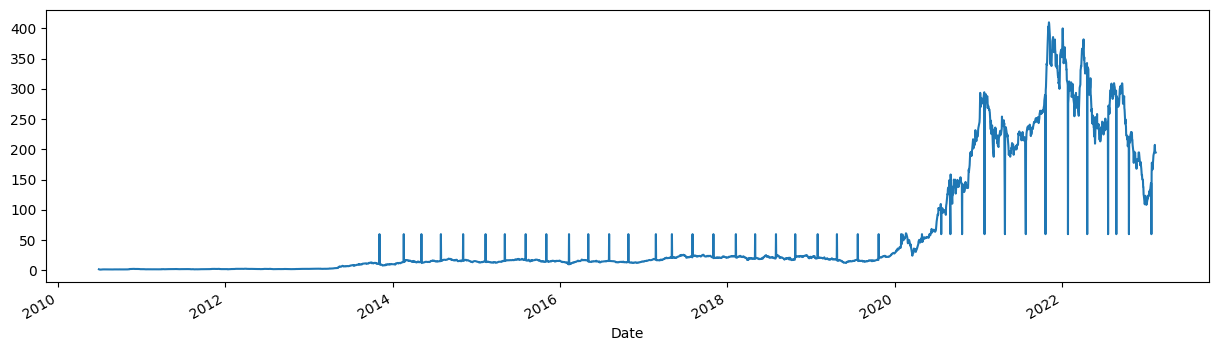

In [22]:
df_tesla['Price'].plot(figsize=(15,4)) 

<AxesSubplot: xlabel='Date'>

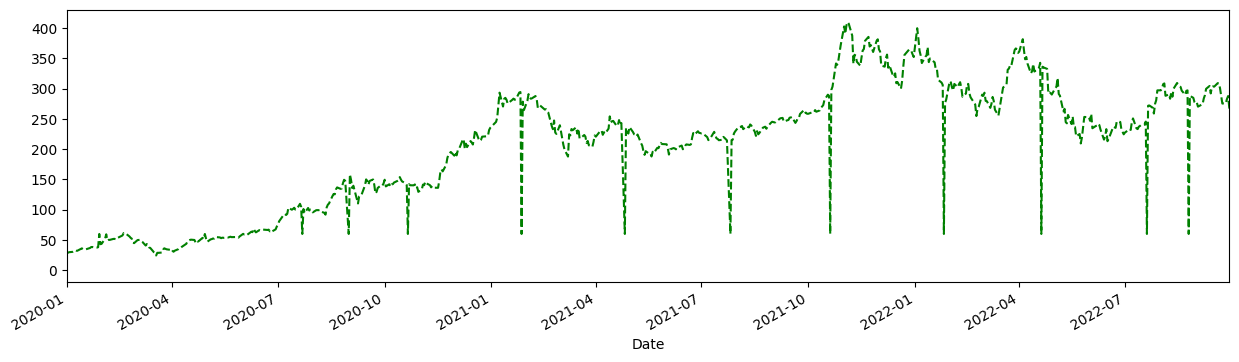

In [23]:
# see only the area , start rose gradually
# apply xlimit and y limit
df_tesla['Price'].plot(xlim=['2020/01/01','2022/09/29'],ls='--',c='green', figsize=(15,4)) 

In [24]:
# tesla stocks open for 2021 
share_open = df_tesla.loc['2021/01/01':'2021/12/31']['Open']  
index = share_open.index 

<AxesSubplot: xlabel='Date'>

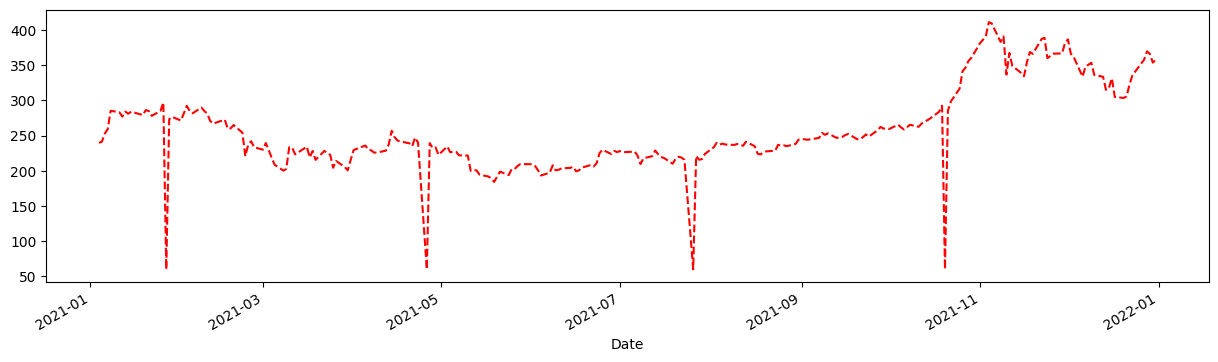

In [25]:
share_open.plot(ls='--',c='red', figsize=(15,4)) 

## Time Resampling

In [26]:
# minimum share price in evey year end
df_tesla.resample(rule='A').min() 

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-12-31,1.050000,1.080000,1.110000,1.000000,1.780000,-16.410000
2011-12-31,1.460000,1.450000,1.480000,1.410000,3.590000,-9.650000
2012-12-31,1.520000,1.770000,1.790000,1.510000,5.470000,-19.150000
2013-12-31,2.190000,2.210000,2.230000,2.140000,6.630000,-14.500000
2014-12-31,9.290000,9.370000,9.800000,9.110000,20.000000,-11.250000
2015-12-31,12.330000,12.390000,12.620000,12.090000,10.650000,-8.880000
2016-12-31,9.870000,9.490000,10.470000,9.400000,24.890000,-10.450000
2017-12-31,14.470000,14.320000,14.690000,14.060000,32.800000,-7.230000
2018-12-31,16.700000,16.850000,17.360000,16.310000,46.210000,-13.900000


In [27]:
# maximum share price in evey year
df_tesla.resample(rule='A').max() 

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-12-31,2.360000,2.390000,2.430000,2.320000,257.92,19.510000
2011-12-31,2.330000,2.310000,2.330000,2.270000,172.84,17.090000
2012-12-31,2.530000,2.550000,2.660000,2.470000,85.27,16.450001
2013-12-31,59.687725,59.743634,61.025938,57.884063,557.46,24.459999
2014-12-31,59.687725,59.743634,61.025938,57.884063,491.96,15.720000
2015-12-31,59.687725,59.743634,61.025938,57.884063,234.74,11.160000
2016-12-31,59.687725,59.743634,61.025938,57.884063,356.14,8.800000
2017-12-31,59.687725,59.743634,61.025938,57.884063,296.87,7.280000
2018-12-31,59.687725,59.743634,61.025938,57.884063,504.75,17.340000


<AxesSubplot: xlabel='Date'>

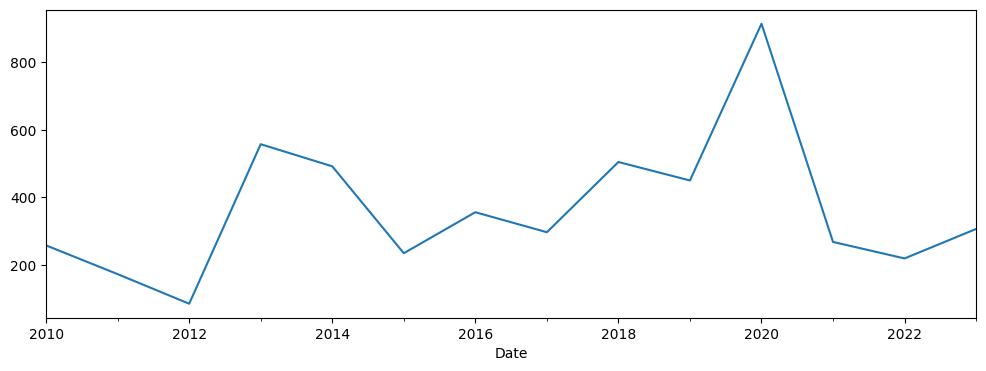

In [28]:
df_tesla.resample(rule='A').max()['Volume'].plot(figsize=(12,4)) 

<AxesSubplot: xlabel='Date'>

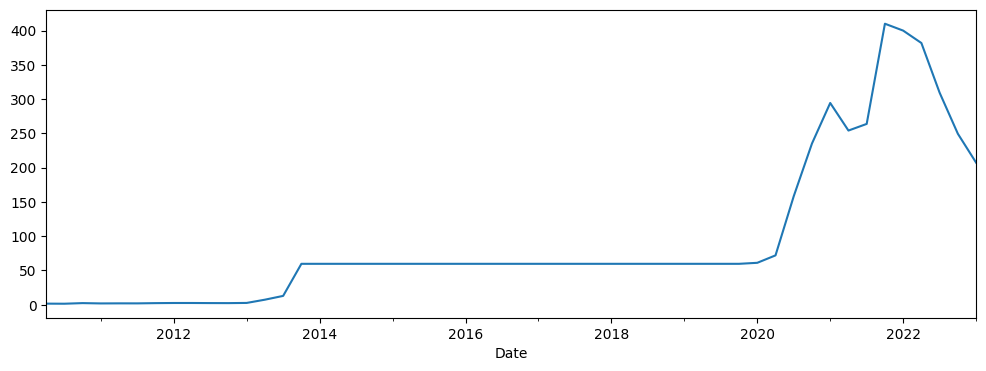

In [29]:
# maximum share price in evey quarter start
df_tesla.resample(rule='QS').max()['Price'].plot(figsize=(12,4)) 

<AxesSubplot: xlabel='Date'>

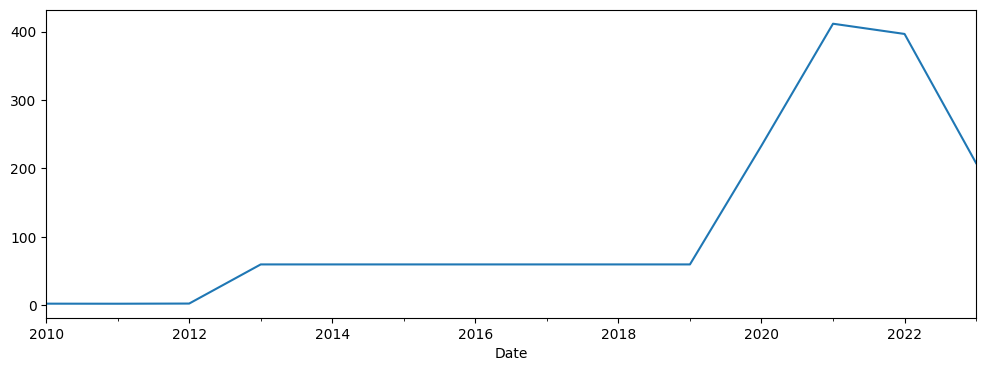

In [30]:
# maximum share open in evey Business year end
df_tesla.resample(rule='BA').max()['Open'].plot(figsize=(12,4)) 

<AxesSubplot: xlabel='Date'>

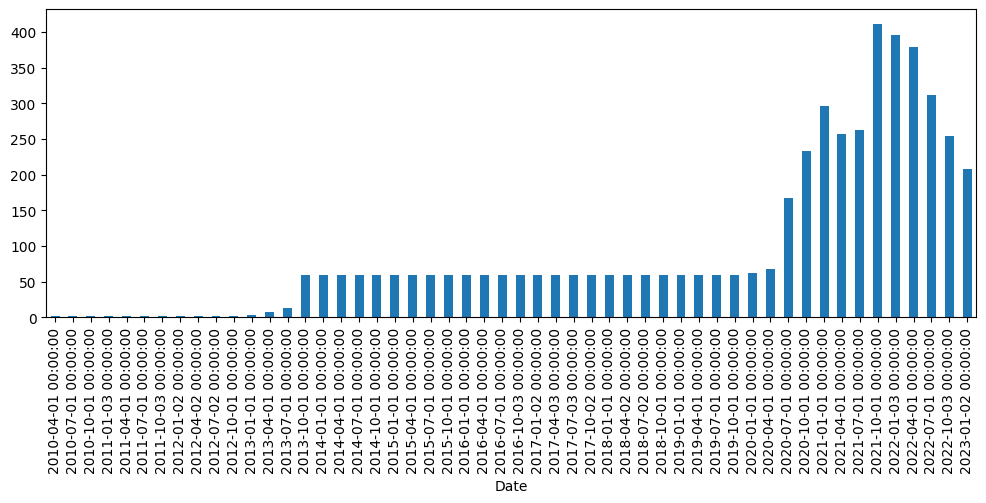

In [31]:
# maximum share open in evey Business Quarter end
df_tesla.resample(rule='BQS').max()['Open'].plot(kind='bar',figsize=(12,4)) 

In [32]:
# mean share volume in every month
df_tesla.resample(rule='M').mean()['Open']

Date
2010-06-30      1.720000
2010-07-31      1.338095
2010-08-31      1.303636
2010-09-30      1.385238
2010-10-31      1.381905
                 ...    
2022-10-31    216.503506
2022-11-30    193.478571
2022-12-31    155.896190
2023-01-31    128.206182
2023-02-28    192.790000
Freq: M, Name: Open, Length: 153, dtype: float64

<AxesSubplot: xlabel='Date'>

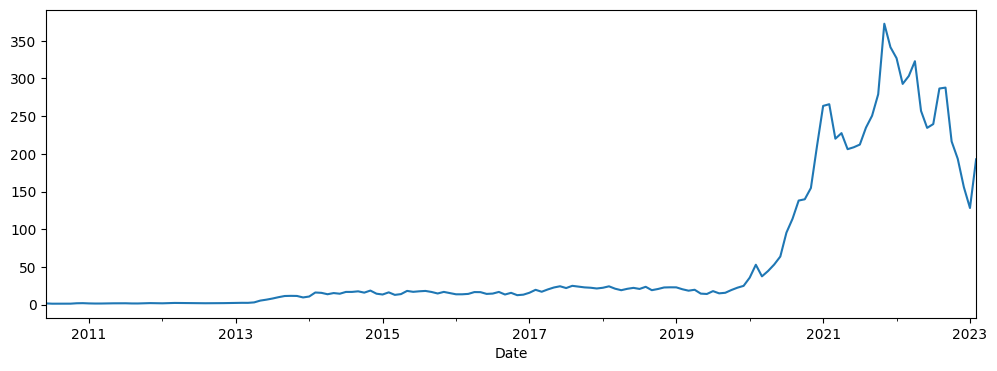

In [33]:
# plot
df_tesla.resample(rule='M').mean()['Open'].plot(kind='line',figsize=(12,4)) 

In [34]:
# applying aggregate function upto specific date or index or on a DataFrame window -- rolling
# remove noise - make smoothing
# mean share close for starting 10 days of 2022 
df_tesla.loc['2022/01/01':'2022/02/01']['Price'].rolling(7).mean() 

Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07           NaN
2022-01-10           NaN
2022-01-11    364.367143
2022-01-12    359.911429
2022-01-13    354.290000
2022-01-14    352.455714
2022-01-18    350.827143
2022-01-19    349.335714
2022-01-20    346.390000
2022-01-21    340.651429
2022-01-24    332.260000
2022-01-25    326.871429
2022-01-26    285.416818
2022-01-27    275.826818
2022-01-28    268.718246
2022-01-31    265.882532
2022-02-01    265.281104
Name: Price, dtype: float64

## Which is the date of the highest price of the stock? 

In [35]:
x = df_tesla[df_tesla['Price'] == df_tesla['Price'].max()].index[0]   
print(x.day_name(),x.day,'th',x.month_name(),x.year) 

Thursday 4 th November 2021


## Which is the date of the lowest price of the stock?

In [36]:
y = df_tesla[df_tesla['Price'] == df_tesla['Price'].min()].index[0]   
print(y.day_name(),y.day,'th',y.month_name(),y.year) 

Wednesday 7 th July 2010


# 

# SMA - simple moving average

## Smoothing out noisy data
`by simple moving average - average of nearby values group,where how many backward value , we will specify by us as rolling value`                  
`-  rolling window`

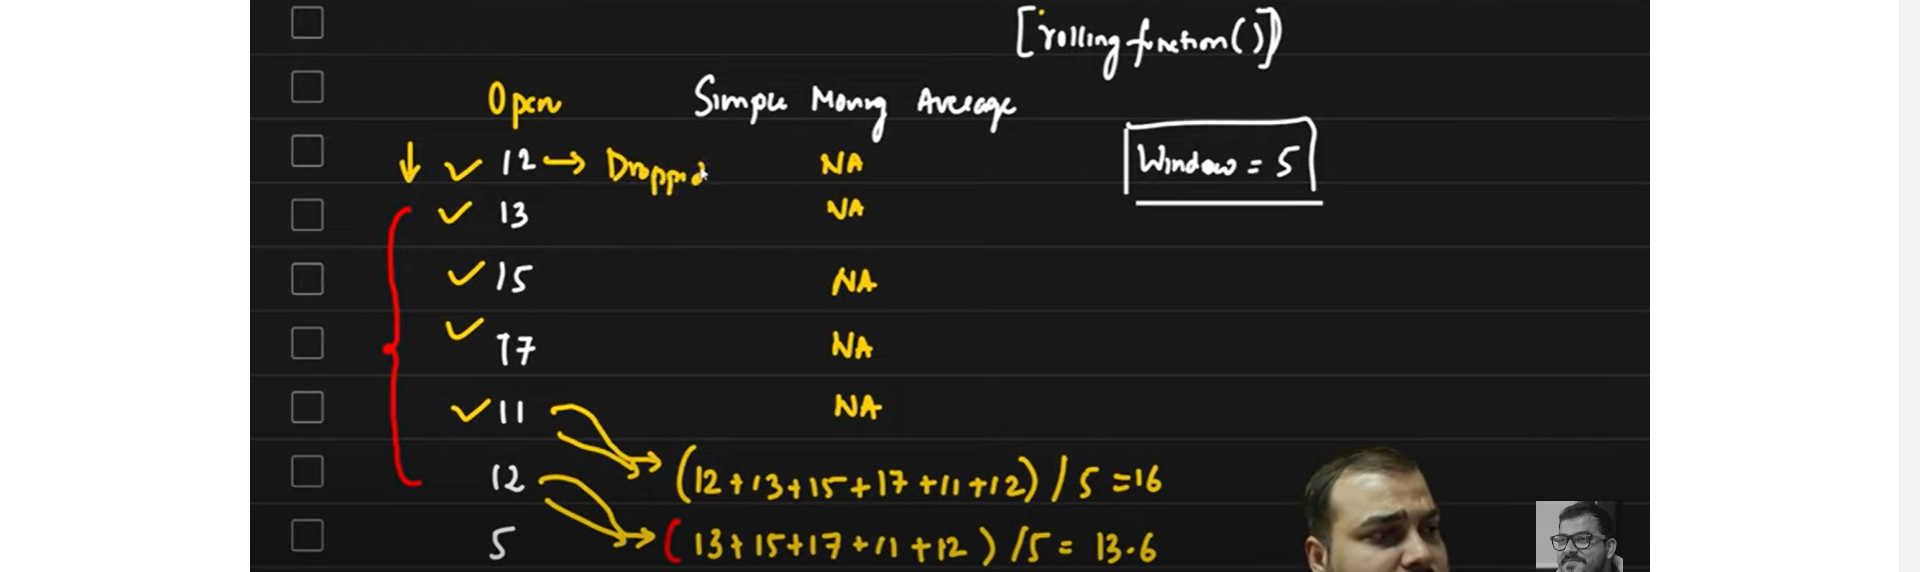 

### - Selecting an appropriate rolling window size for smoothing a time series depends on various factors such as the nature of the data, the frequency of the observations, and the level of smoothing desired.
- when we want more realistic value - low rolling value 
- when we want more mean or approx value - high rolling value 

In [39]:
df_tesla['Open: 30 days rolling']= df_tesla['Open'].rolling(window=8).mean() 

<AxesSubplot: xlabel='Date'>

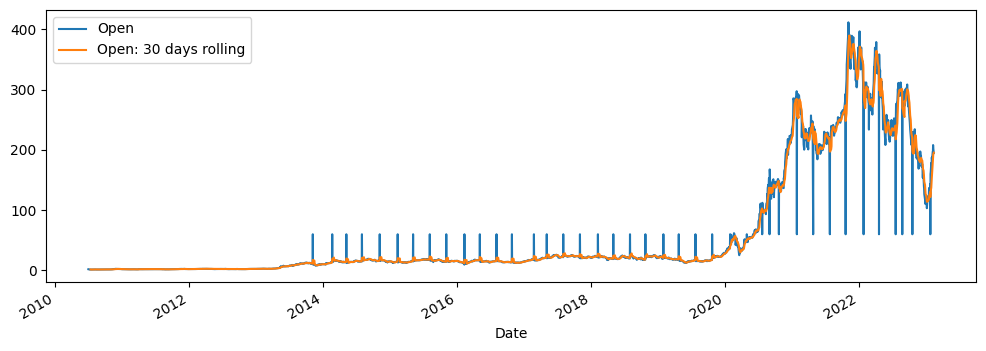

In [40]:
df_tesla[['Open','Open: 30 days rolling']].plot(figsize=(12,4))    

min_periods - there must be atleast that much non-values.
The min_periods parameter is a useful tool for handling missing data in time series analysis, as it allows you to control the minimum amount of data required for a rolling calculation to be performed.

# usage: 
- after graph intersect each other, real graph increases - selling of stocks
- after graph intersect each other, real graph decreases - buying of stocks 

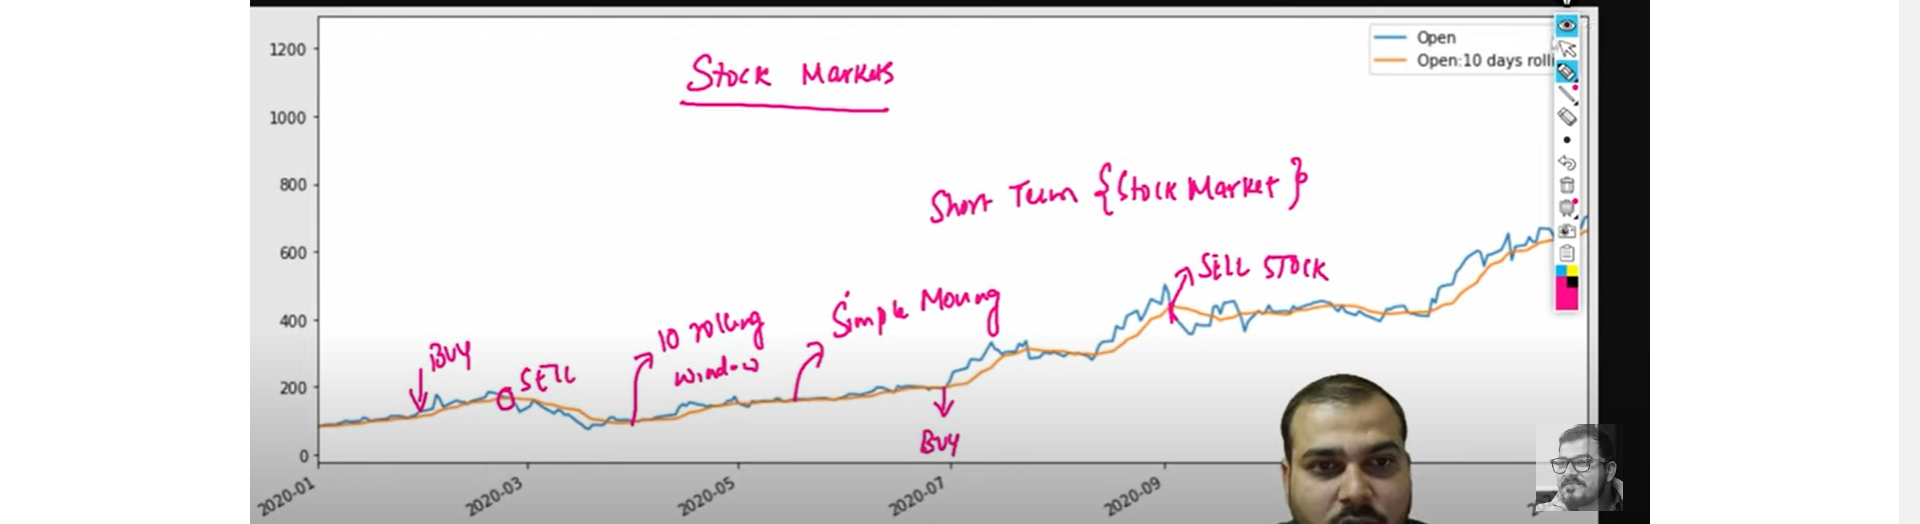

In [87]:
# Compare different rolling numbers 
df_tesla['Open: 10 days rolling']= df_tesla['Open'].rolling(window=10,min_periods=1).mean()  
df_tesla['Open: 30 days rolling']= df_tesla['Open'].rolling(window=30,min_periods=1).mean()  
df_tesla['Open: 50 days rolling']= df_tesla['Open'].rolling(window=50,min_periods=1).mean()  

<AxesSubplot: xlabel='Date'>

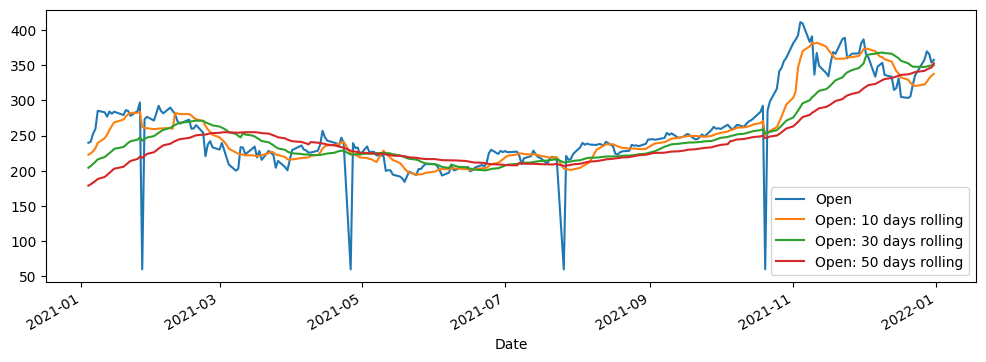

In [88]:
df_tesla[['Open','Open: 10 days rolling','Open: 30 days rolling','Open: 50 days rolling']].loc["2021/1/1":"2021/12/31"].plot(figsize=(12,4))    

# 

#  CMA cummulative moving average
Cumulative Moving Average (CMA) is a type of moving average that calculates the average of a data series by progressively adding the latest data points and removing the earliest data points

`It helps smooth out short-term price fluctuations and provides a clearer picture of the long-term trend.`

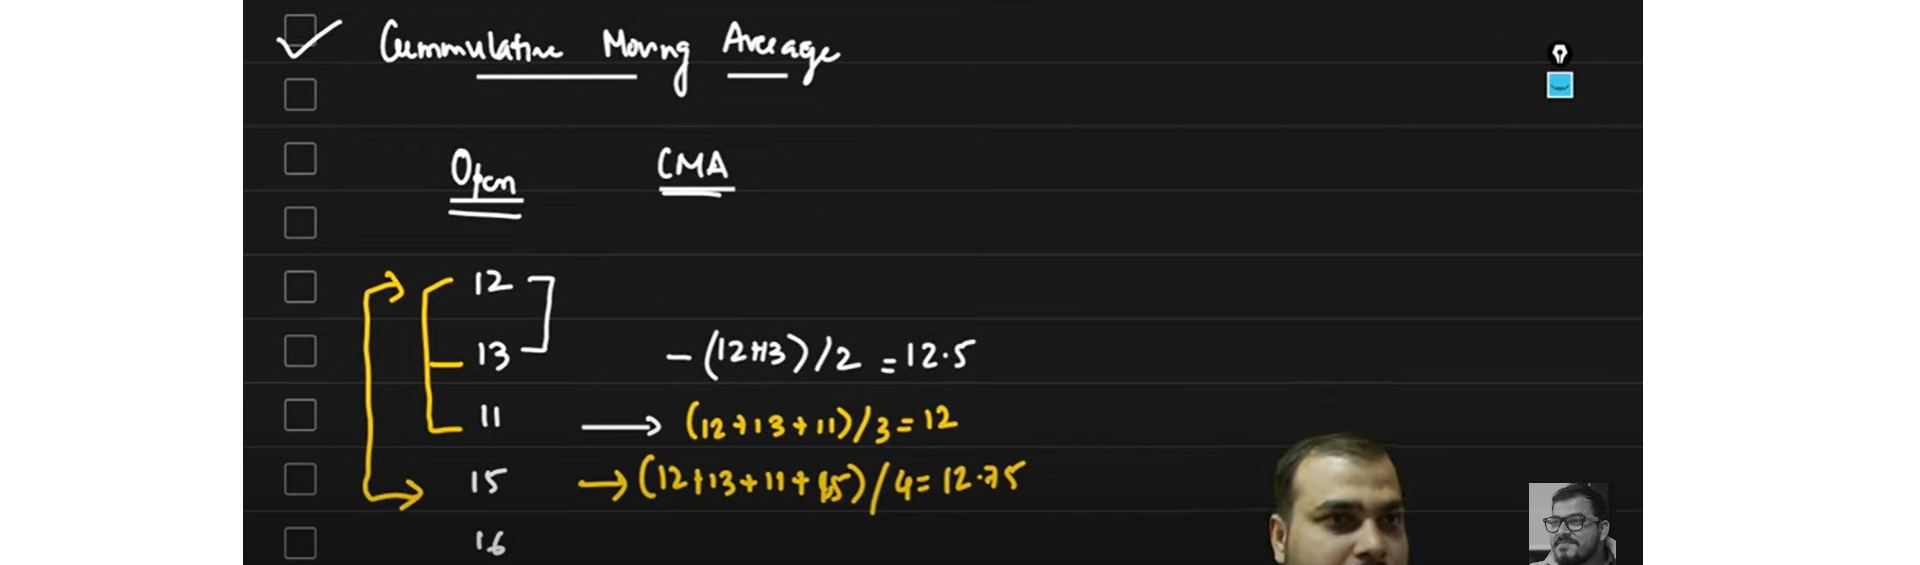

### if graph of CMA is increasing, it means stocks price is increasing.

<AxesSubplot: xlabel='Date'>

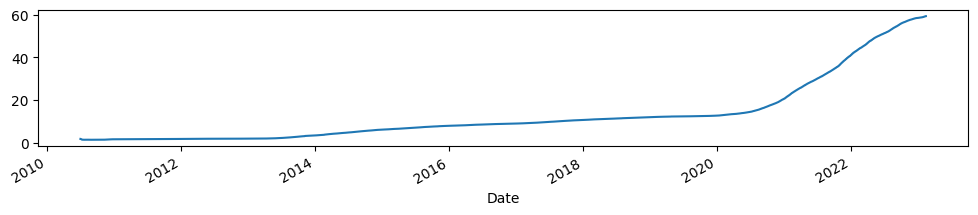

In [57]:
# Expending 

df_tesla['Open CMA'] = df_tesla['Open'].expanding().mean()
df_tesla['Open CMA'].plot(figsize=(12,2)) 

<AxesSubplot: xlabel='Date'>

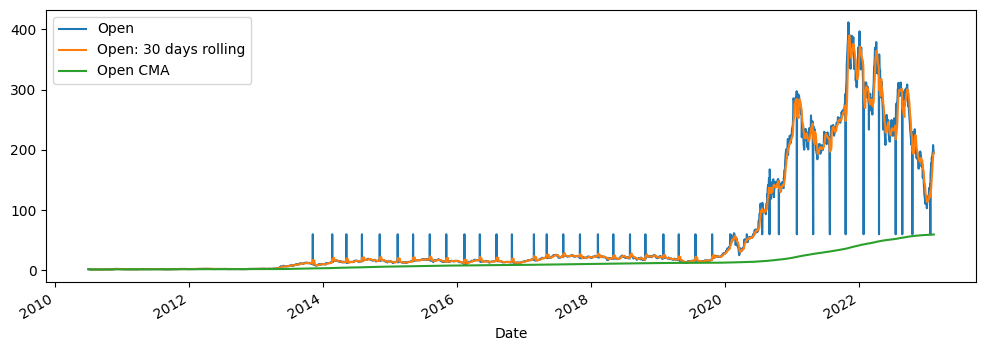

In [58]:
 df_tesla[['Open',"Open: 30 days rolling",'Open CMA']].plot(figsize=(12,4)) 

## 

# EWMA - exponential weighted moving average 
EWMA reacts more quickly to changes in the data series and provides a more accurate representation of the current trend.        
The formula for calculating EWMA involves multiplying each data point by a weight factor and summing the results, with the most recent data points having the highest weight. The weight factor is determined by a smoothing factor, which determines the rate at which the weights decrease over time. A higher smoothing factor means that more weight is given to recent data points, while a lower smoothing factor means that more weight is given to older data points.
- increase the value of alpha to make it more realistic                                                                          - add span  for giving window size

<AxesSubplot: xlabel='Date'>

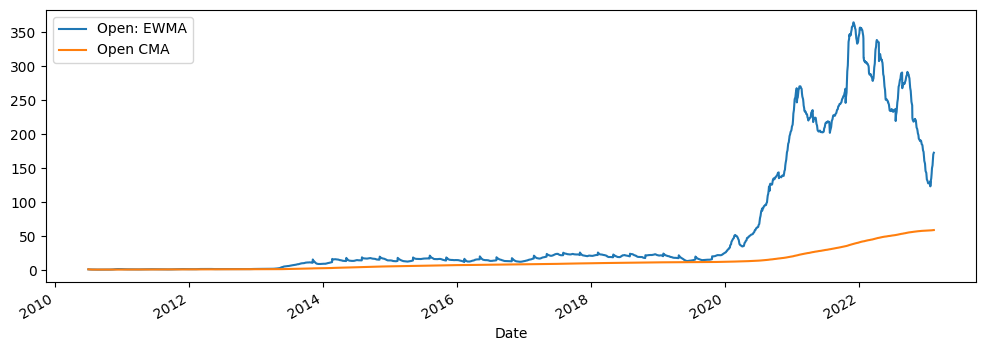

In [59]:
df_tesla['Open: EWMA'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()   
df_tesla[['Open: EWMA','Open CMA']].plot(figsize=(12,4)) 